In [27]:
#import libray
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#load excel file
df = pd.read_csv('all_employees.csv')
df1 = pd.read_csv('employee.csv')
df2 = pd.read_csv('company_hierarchy.csv')

In [29]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     10000 non-null  int64 
 1   signing_bonus   10000 non-null  int64 
 2   salary          10000 non-null  int64 
 3   degree_level    10000 non-null  object
 4   sex             10000 non-null  object
 5   yrs_experience  10000 non-null  int64 
 6   boss_id         10000 non-null  int64 
 7   dept            10000 non-null  object
 8   level           10000 non-null  object
dtypes: int64(5), object(4)
memory usage: 703.2+ KB


employee_id       0
signing_bonus     0
salary            0
degree_level      0
sex               0
yrs_experience    0
boss_id           0
dept              0
level             0
dtype: int64

In [30]:
df1.head()
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employee_id     10000 non-null  int64  
 1   signing_bonus   10000 non-null  int64  
 2   salary          10000 non-null  float64
 3   degree_level    10000 non-null  object 
 4   sex             10000 non-null  object 
 5   yrs_experience  10000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


employee_id       0
signing_bonus     0
salary            0
degree_level      0
sex               0
yrs_experience    0
dtype: int64

In [31]:
df2.head()
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  10000 non-null  int64  
 1   boss_id      9999 non-null   float64
 2   dept         10000 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


employee_id    0
boss_id        1
dept           0
dtype: int64

# Question 1

In [32]:
df.groupby(['level']).count()

employee_id  signing_bonus  salary  degree_level   sex  yrs_experience  \
level                                                                           
CEO              1              1       1             1     1               1   
D              160            160     160           160   160             160   
E                4              4       4             4     4               4   
IC            9000           9000    9000          9000  9000            9000   
MM             800            800     800           800   800             800   
VP              35             35      35            35    35              35   

       boss_id  dept  
level                 
CEO          1     1  
D          160   160  
E            4     4  
IC        9000  9000  
MM         800   800  
VP          35    35

Number of employee in each level:
Individual contributors (IC) = 9000
Middle managers (MM) = 800
Directors (D) = 160
VP = 35
Executives (E) = 4
CEO = 1

In [33]:
df.groupby(['dept']).count()

employee_id  signing_bonus  salary  degree_level   sex  \
dept                                                                  
CEO                    1              1       1             1     1   
HR                  1694           1694    1694          1694  1694   
engineering         2696           2696    2696          2696  2696   
marketing           2010           2010    2010          2010  2010   
sales               3599           3599    3599          3599  3599   

             yrs_experience  boss_id  level  
dept                                         
CEO                       1        1      1  
HR                     1694     1694   1694  
engineering            2696     2696   2696  
marketing              2010     2010   2010  
sales                  3599     3599   3599

In [34]:
df.groupby(['dept', 'level']).count()

employee_id  signing_bonus  salary  degree_level   sex  \
dept        level                                                           
CEO         CEO              1              1       1             1     1   
HR          D               27             27      27            27    27   
            E                1              1       1             1     1   
            IC            1524           1524    1524          1524  1524   
            MM             136            136     136           136   136   
            VP               6              6       6             6     6   
engineering D               43             43      43            43    43   
            E                1              1       1             1     1   
            IC            2429           2429    2429          2429  2429   
            MM             213            213     213           213   213   
            VP              10             10      10            10    10   
marketing   D               35             35      35            35    35   
            E                1              1       1             1     1   
            IC            1802           1802    1802          1802  1802   
            MM             163            163     163           163   163   
            VP               9              9       9             9     9   
sales       D               55             55      55            55    55   
            E                1              1       1             1     1   
            IC            3245           3245    3245          3245  3245   
            MM             288            288     288           288   288   
            VP              10             10      10            10    10   

                   yrs_experience  boss_id  
dept        level                           
CEO         CEO                 1        1  
HR          D                  27       27  
            E                   1        1  
            IC               1524     1524  
            MM                136      136  
            VP                  6        6  
engineering D                  43       43  
            E                   1        1  
            IC               2429     2429  
            MM                213      213  
            VP                 10       10  
marketing   D                  35       35  
            E                   1        1  
            IC               1802     1802  
            MM                163      163  
            VP                  9        9  
sales       D                  55       55  
            E                   1        1  
            IC               3245     3245  
            MM                288      288  
            VP                 10       10

Number of employee in HR department:
Total number of employee = 1694
Individual contributors (IC) = 1524
Middle managers (MM) = 134
Directors (D) = 27
VP = 6
Executives (E) = 1

Number of employee in engineering department:
Total number of employee = 2696
Individual contributors (IC) = 2429
Middle managers (MM) = 213
Directors (D) = 43
VP = 10
Executives (E) = 1

Number of employee in marketing department:
Total number of employee = 2010
Individual contributors (IC) = 1802
Middle managers (MM) = 163
Directors (D) = 35
VP = 9
Executives (E) = 1

Number of employee in sales department:
Total number of employee = 3599
Individual contributors (IC) = 345
Middle managers (MM) = 288
Directors (D) = 55
VP = 10
Executives (E) = 1


# Question 2

In [35]:
df['employee_managed'] = 0
MMs = df.loc[df.level == 'MM']


for index,row in MMs.iterrows():
    df.loc[index,'employee_managed'] = len(df.loc[df.boss_id == row.employee_id])
df.loc[df.level == 'MM']

employee_id  signing_bonus  salary degree_level sex  yrs_experience  \
6          101901              1     194          PhD   M              12   
11         153551              0     232          PhD   M              10   
15          23737              0      76     Bachelor   F              13   
18          98520              0     300       Master   M               7   
52          10786              0      86     Bachelor   M              10   
...           ...            ...     ...          ...  ..             ...   
9890       115349              1     146          PhD   M               5   
9897       152960              0     264  High_School   F               7   
9910       181886              0     136     Bachelor   M               4   
9955       164439              0     175          PhD   M               3   
9977       129410              0     309  High_School   M              13   

      boss_id         dept level  employee_managed  
6        7558  engineering    MM                 6  
11      47755        sales    MM                 9  
15     198893           HR    MM                17  
18      70434    marketing    MM                20  
52     165426           HR    MM                12  
...       ...          ...   ...               ...  
9890    41945        sales    MM                 5  
9897   157492        sales    MM                 9  
9910   181201        sales    MM                11  
9955   191391    marketing    MM                 9  
9977     3917        sales    MM                14  

[800 rows x 10 columns]

In [36]:
Ds = df.loc[df.level == 'D']
Ds['employee_managed']=0

for index,row in Ds.iterrows():
    number = len(df.loc[df.boss_id == row.employee_id]) + sum(df.loc[df.boss_id == row.employee_id].employee_managed)
    df.loc[index,'employee_managed'] = number
    if number == 0:
        print(index,row.employee_id)
df.loc[df.level=='D']

<ipython-input-36-0578553095aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ds['employee_managed']=0


9875 8473


employee_id  signing_bonus  salary degree_level sex  yrs_experience  \
71          57693              1     317          PhD   M               3   
73          33814              0      95          PhD   M              16   
114        196484              0     106          PhD   M              19   
201         66090              1     349       Master   M              20   
227        163049              0     260     Bachelor   F              13   
...           ...            ...     ...          ...  ..             ...   
9676        94454              1      83          PhD   M              10   
9711        49002              0     178       Master   F              12   
9754       147555              0      93          PhD   M              17   
9764       116660              0      89          PhD   M               8   
9875         8473              0      60     Bachelor   M              23   

      boss_id         dept level  employee_managed  
71      69728  engineering     D                33  
73     190801  engineering     D                62  
114    176424    marketing     D                63  
201     34280        sales     D                35  
227     56068        sales     D                37  
...       ...          ...   ...               ...  
9676    84011        sales     D                91  
9711   109804  engineering     D               100  
9754   107152  engineering     D                36  
9764    26053           HR     D                94  
9875    26053           HR     D                 0  

[160 rows x 10 columns]

In [37]:
VPs = df.loc[df.level == 'VP']

for index,row in VPs.iterrows():
    number = len(df.loc[df.boss_id == row.employee_id]) + sum(df.loc[df.boss_id == row.employee_id].employee_managed)
    df.loc[index,'employee_managed'] = number
    if number == 0:
        print(index,row.employee_id)
df.loc[df.level=='VP']

employee_id  signing_bonus  salary degree_level sex  yrs_experience  \
184         74062              1     397          PhD   M              33   
494        162476              1     330          PhD   F              33   
576        176367              1     286       Master   M              27   
667         34051              0     359          PhD   F              26   
1019        26053              1     180          PhD   M               9   
1258        96752              0     234          PhD   M              26   
1541        97647              0     102  High_School   F              23   
1824        71499              0     359          PhD   M              26   
1834       109804              1     199          PhD   M              24   
1894       152500              0     112       Master   M              19   
2005       176424              0     191       Master   M              15   
2463       107152              1      99          PhD   F              13   
2539       124994              0     181  High_School   F              18   
3689        40920              0     369       Master   M              24   
4017       154041              0     284     Bachelor   M              15   
4162        79693              1     241          PhD   M              19   
4205       139032              1     346          PhD   F              32   
4480       133795              0     251          PhD   M              11   
4859        71889              0     325       Master   M              24   
4919       149778              1     177     Bachelor   M              10   
5250       109308              0     210       Master   F              21   
5629       142146              1     380          PhD   F              34   
5894        56068              1     239       Master   M              32   
6255       190801              0     277          PhD   M              19   
6571        55537              0     266       Master   M               8   
6843       107658              0     189          PhD   M              27   
8425       185673              0     271       Master   M              16   
8563       177860              0     202          PhD   M               6   
8733        34280              1     195       Master   M              26   
8841       125855              1     361          PhD   M              30   
9015       138045              0     218       Master   M              10   
9264        84011              0     328     Bachelor   F              30   
9749       197876              1     325          PhD   M               7   
9819        36075              0     265       Master   M              16   
9891        69728              0     283       Master   M              14   

      boss_id         dept level  employee_managed  
184    110464    marketing    VP               308  
494     51535  engineering    VP               286  
576     51535  engineering    VP               199  
667     11277        sales    VP               607  
1019    93708           HR    VP               327  
1258    11277        sales    VP               176  
1541   110464    marketing    VP               265  
1824   110464    marketing    VP               111  
1834    51535  engineering    VP               344  
1894    93708           HR    VP               183  
2005   110464    marketing    VP               206  
2463    51535  engineering    VP               174  
2539    93708           HR    VP               354  
3689   110464    marketing    VP               259  
4017    11277        sales    VP               238  
4162    51535  engineering    VP               290  
4205    11277        sales    VP               391  
4480    51535  engineering    VP               179  
4859    93708           HR    VP               389  
4919   110464    marketing    VP               254  
5250   110464    marketing    VP               121  
5629    11277        sales    VP               363  
5894    11277 

In [38]:
VPs = df.loc[df.level == 'VP']

for index,row in VPs.iterrows():
    number = len(df.loc[df.boss_id == row.employee_id]) + sum(df.loc[df.boss_id == row.employee_id].employee_managed)
    df.loc[index,'employee_managed'] = number
    if number == 0:
        print(index,row.employee_id)
df.loc[df.level=='VP']

employee_id  signing_bonus  salary degree_level sex  yrs_experience  \
184         74062              1     397          PhD   M              33   
494        162476              1     330          PhD   F              33   
576        176367              1     286       Master   M              27   
667         34051              0     359          PhD   F              26   
1019        26053              1     180          PhD   M               9   
1258        96752              0     234          PhD   M              26   
1541        97647              0     102  High_School   F              23   
1824        71499              0     359          PhD   M              26   
1834       109804              1     199          PhD   M              24   
1894       152500              0     112       Master   M              19   
2005       176424              0     191       Master   M              15   
2463       107152              1      99          PhD   F              13   
2539       124994              0     181  High_School   F              18   
3689        40920              0     369       Master   M              24   
4017       154041              0     284     Bachelor   M              15   
4162        79693              1     241          PhD   M              19   
4205       139032              1     346          PhD   F              32   
4480       133795              0     251          PhD   M              11   
4859        71889              0     325       Master   M              24   
4919       149778              1     177     Bachelor   M              10   
5250       109308              0     210       Master   F              21   
5629       142146              1     380          PhD   F              34   
5894        56068              1     239       Master   M              32   
6255       190801              0     277          PhD   M              19   
6571        55537              0     266       Master   M               8   
6843       107658              0     189          PhD   M              27   
8425       185673              0     271       Master   M              16   
8563       177860              0     202          PhD   M               6   
8733        34280              1     195       Master   M              26   
8841       125855              1     361          PhD   M              30   
9015       138045              0     218       Master   M              10   
9264        84011              0     328     Bachelor   F              30   
9749       197876              1     325          PhD   M               7   
9819        36075              0     265       Master   M              16   
9891        69728              0     283       Master   M              14   

      boss_id         dept level  employee_managed  
184    110464    marketing    VP               308  
494     51535  engineering    VP               286  
576     51535  engineering    VP               199  
667     11277        sales    VP               607  
1019    93708           HR    VP               327  
1258    11277        sales    VP               176  
1541   110464    marketing    VP               265  
1824   110464    marketing    VP               111  
1834    51535  engineering    VP               344  
1894    93708           HR    VP               183  
2005   110464    marketing    VP               206  
2463    51535  engineering    VP               174  
2539    93708           HR    VP               354  
3689   110464    marketing    VP               259  
4017    11277        sales    VP               238  
4162    51535  engineering    VP               290  
4205    11277        sales    VP               391  
4480    51535  engineering    VP               179  
4859    93708           HR    VP               389  
4919   110464    marketing    VP               254  
5250   110464    marketing    VP               121  
5629    11277        sales    VP               363  
5894    11277 

In [39]:
Es = df.loc[df.level == 'E']

for index,row in Es.iterrows():
    number = len(df.loc[df.boss_id == row.employee_id]) + sum(df.loc[df.boss_id == row.employee_id].employee_managed)
    df.loc[index,'employee_managed'] = number
    if number == 0:
        print(index,row.employee_id)
df.loc[df.level=='E']

employee_id  signing_bonus  salary degree_level sex  yrs_experience  \
8184        93708              1     500          PhD   F              28   
8235        51535              1     650          PhD   M              33   
9119        11277              1     550       Master   M              22   
9410       110464              1     550       Master   M              21   

      boss_id         dept level  employee_managed  
8184    61554           HR     E              1693  
8235    61554  engineering     E              2695  
9119    61554        sales     E              3598  
9410    61554    marketing     E              2009

In [40]:
CEO = df.loc[df.level == 'CEO']

for index,row in CEO.iterrows():
    number = len(df.loc[df.boss_id == row.employee_id]) + sum(df.loc[df.boss_id == row.employee_id].employee_managed)
    df.loc[index,'employee_managed'] = number
    if number == 0:
        print(index,row.employee_id)
df.loc[df.level=='CEO']


employee_id  signing_bonus  salary degree_level sex  yrs_experience  \
6367        61554              1     700          PhD   M               7   

      boss_id dept level  employee_managed  
6367       -1  CEO   CEO              9999

# Question 3

In [41]:
#Converting data
from sklearn.preprocessing import LabelEncoder

train = df

label = LabelEncoder()
label.fit(train['sex'])
train['sex'] = label.transform(train['sex'])

label.fit(train['degree_level'])
train['degree_level'] = label.transform(train['degree_level'])

label.fit(train['dept'])
train['dept'] = label.transform(train['dept'])

label.fit(df['level'])
train['level'] = label.transform(train['level'])



In [42]:
#drop irrelevant column
train.drop('employee_id', axis=1, inplace=True)
train.drop('boss_id', axis=1, inplace=True)


In [43]:
train.head()


signing_bonus  salary  degree_level  sex  yrs_experience  dept  level  \
0              0     273             2    1               2     2      3   
1              0     301             0    0               1     4      3   
2              0     261             2    0               2     4      3   
3              0      86             1    0               4     1      3   
4              0     126             0    0               3     4      3   

   employee_managed  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [44]:
train = train[['signing_bonus', 'degree_level', 'sex', 'yrs_experience','dept','level','employee_managed','salary']]
train.head()

signing_bonus  degree_level  sex  yrs_experience  dept  level  \
0              0             2    1               2     2      3   
1              0             0    0               1     4      3   
2              0             2    0               2     4      3   
3              0             1    0               4     1      3   
4              0             0    0               3     4      3   

   employee_managed  salary  
0                 0     273  
1                 0     301  
2                 0     261  
3                 0      86  
4                 0     126

In [45]:
#load into model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

x = train.iloc[:,0:7].values
y = train.iloc[:,7].values


from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5 ,metric = 'minkowski', p = 2)
scoring = 'accuracy'
score = cross_val_score(clf, x , y , cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)



0.54

In [46]:
#try a different model
from sklearn.neighbors import KNeighborsRegressor
Neigh = KNeighborsRegressor(n_neighbors=10)
Neigh.fit(x,y)

Neigh.predict(x)


array([207. , 206.2, 199.5, ..., 230.5, 198.3, 173.4])

# Question 4

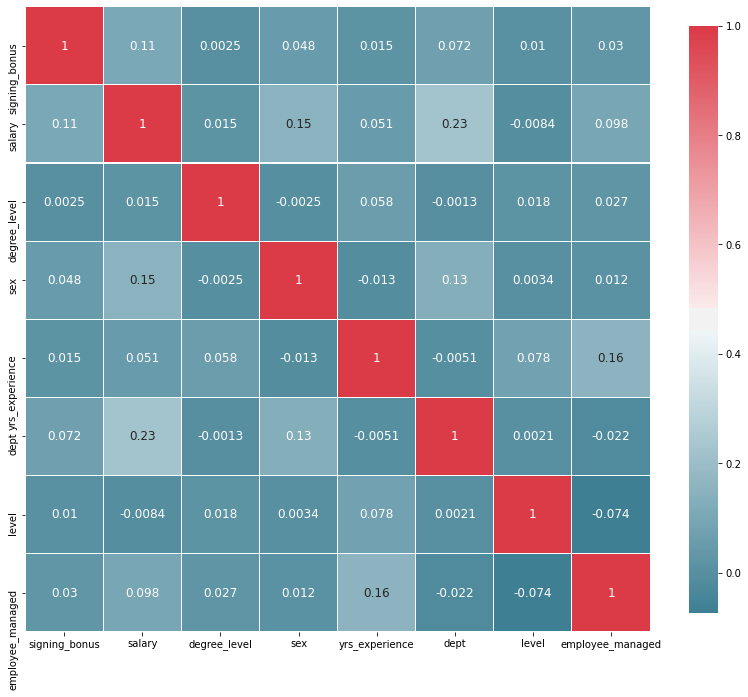

In [54]:
#correlation heatmap of dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )


correlation_heatmap(df)

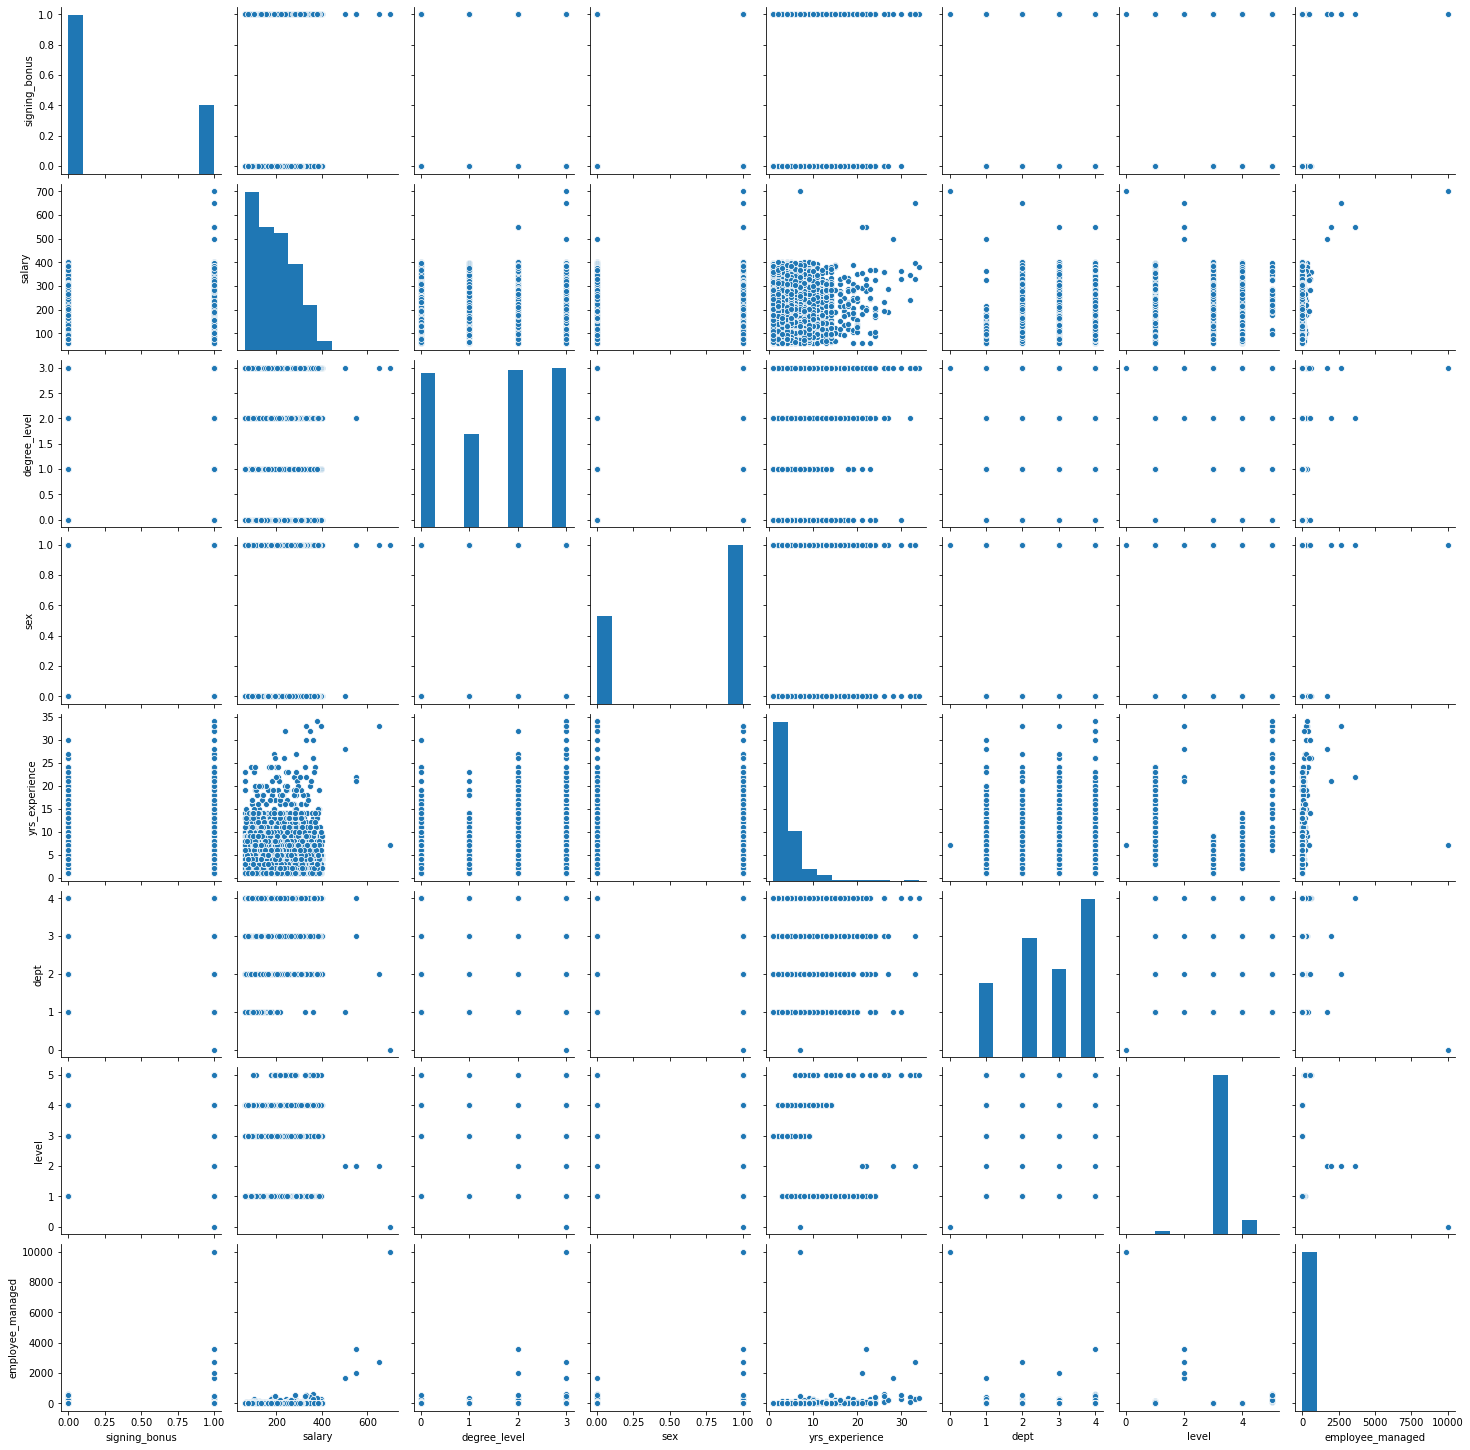

In [62]:
sns.pairplot(df)

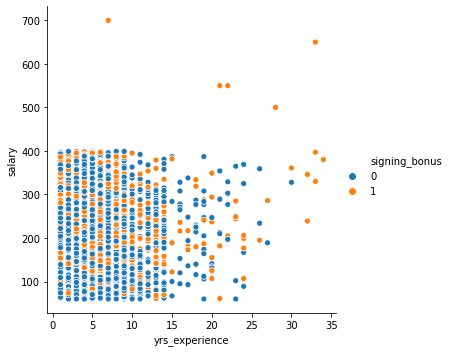

In [69]:
sns.relplot(x = 'yrs_experience', y ='salary',hue = 'signing_bonus', data = df )

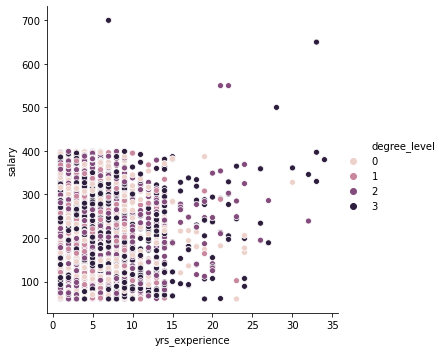

In [59]:
sns.relplot(x = 'yrs_experience', y ='salary', hue = 'degree_level', data = df )

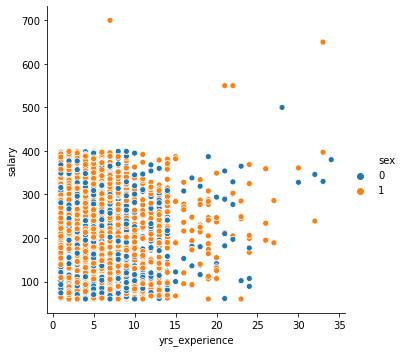

In [70]:
sns.relplot(x = 'yrs_experience', y ='salary', hue = 'sex', data = df )

Describe the main factors affecting the employee salaries. 
According to the correlation matrix,signing bonus and department are the main factors affecting the employee salary.

Do you think the company has been treating its employees fairly?
No, I think that the company had not been treating its employees fairly.

Do you see any bias?
No. Base on the graphs, I don't see any obvious bias. However, there are more female employee than male employee.

What are some next steps you would suggest to the Talent Leader?
First suggestion is that salary can link to the years of experience.
Second suggestion is that salary can link to degree level.
Third suggestion is that can consider to increase the percentage of male employee.
Last suggestion is that talent team can track on employee's other data such as KPI.This allows them to access the performance hence to review the salary of each employee. 